In [1]:
import scipy
from scipy import ndimage
import scipy.optimize
from skimage import measure
from skimage import data
from skimage import filters
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
from __future__ import division
import png
from matplotlib.pyplot import imshow

In [2]:
%matplotlib inline

In [3]:
img = ndimage.imread("./red-yellow.jpg")

In [4]:
im = filters.gaussian_filter(img, sigma=256 / (4. * 20))

/Users/admin/miniconda2/lib/python2.7/site-packages/skimage/filters/_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):
/Users/admin/miniconda2/lib/python2.7/site-packages/skimage/filters/_gaussian.py:94: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


In [5]:
blobs = im < im.mean()
blobs = np.any(blobs, axis=2)[:,:,None]

In [6]:
all_labels = measure.label(blobs)

In [7]:
sq1m = np.ma.masked_where(all_labels != 2, all_labels)
m = np.repeat(sq1m.mask,3,axis=2)

sq1 = np.ma.masked_array(img, mask=m)

sq1.fill_value = 0

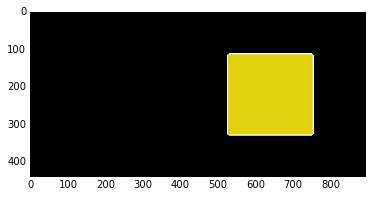

In [8]:
imshow(sq1.filled())